In [2]:
#@title Librerias
from scipy.interpolate import lagrange
from scipy.interpolate import BarycentricInterpolator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: David Alejandro Pérez
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [3]:
R = 0.142
L = 0.98


data = { 'Tiempo (s)':[1.00, 1.01, 1.02, 1.03, 1.04],
        'Corriente (A)': [3.10, 3.12, 3.14, 3.18, 3.24]}

data_cir = pd.DataFrame(data)

data_cir

def finite_diff(x, y, h = 0.5):

  """
  Calcula las diferencias finitas para una función f en un conjunto de puntos x con paso h.

  Parámetros:
  - y: función a derivar.
  - x: array de puntos donde evaluar la derivada.
  - h: paso entre puntos en el array x.

  Retorna:
  - Array de las derivadas aproximadas en cada punto de x.
  """

  diff = []
  for i in range(len(x)):

    if i == 0 and len(x) != 1:
      dx = (- y(x[i]) + y(x[i] + h))/(h)

    if (i != 0 and i != len(x)) or len(x) == 1:
      dx = (y(x[i] + h) - y(x[i] - h))/(2*h)

    if i == len(x)-1 and i != 0:
      dx = (y(x[i]) - y(x[i] - h))/(h)

    diff.append(dx)


  return diff

def three_point_derivative(x, y, h = 0.5):

  """
  Calcula la derivada de 3 puntos para una función f en un conjunto de puntos x con paso h.

  Parámetros:
  - y: función a derivar.
  - x: array de puntos donde evaluar la derivada.
  - h: paso entre puntos en el array x.

  Retorna:
  - Array de las derivadas aproximadas en cada punto de x.
  """

  diff = []
  for i in range(len(x)):

    if i == 0 and len(x) != 1:
      dx = (-3*y(x[i]) + 4*y(x[i] + h) - y(x[i] + 2*h))/(2*h)

    if (i != 0 and i != len(x)) or len(x) == 1:
      dx = (y(x[i] + h) - y(x[i] - h))/(2*h)

    if i == len(x)-1 and i != 0:
      dx = (3*y(x[i]) - 4*y(x[i] - h) + y(x[i] - 2*h))/(2*h)

    diff.append(dx)


  return diff

t = [1.00, 1.01, 1.02, 1.03, 1.04]

i = [3.10, 3.12, 3.14, 3.18, 3.24]

# encontramos un polinomio interpolador que nos de una aproximacion de la funcion
pol_i = BarycentricInterpolator(t, i)

# encontremos la derivada en los puntos t de este polinomio

finitedf = finite_diff(t, pol_i, 10e-9)
three_df = three_point_derivative(t, pol_i, 10e-9)


#derivada_i = three_point_derivative(t, i, 0.005)


print("profe me dijiste que como yo encontre la derivada mediante metodos de interpolacion, entonces que no hiciera comparacion entonces por eso lo dejo asi")




profe me dijiste que como yo encontre la derivada mediante metodos de interpolacion, entonces que no hiciera comparacion entonces por eso lo dejo asi


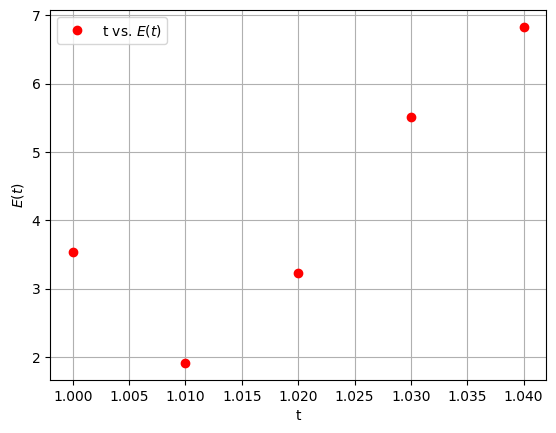

In [4]:
# Funcion para calcular la fem en funcion del tiempo:

E = lambda i, di: L*(di) + R*i

Et = []
for j in range(len(t)):
  et = E(i[j], three_df[j])
  Et.append(et)



plt.plot(t, Et, 'ro', label = 't vs. $E(t)$')
plt.xlabel('t')
plt.ylabel('$E(t)$')
plt.legend()
plt.grid()
plt.show()

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

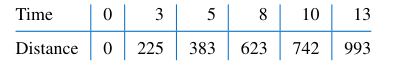



In [5]:
time = [0,3,5,8,10,13]
distance = [0, 225, 383, 623, 742, 993]

v = np.gradient(distance, time)

int_v = lagrange(time, v)

print(f" Mediante el metodo de interpolacion de lagrange se encontro un polinomio asociado a la velocidad para t = 12, v = { int_v(12) }")


 Mediante el metodo de interpolacion de lagrange se encontro un polinomio asociado a la velocidad para t = 12, v = 81.55800000000855


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

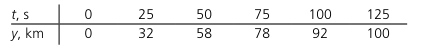

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [6]:
t = [0, 25, 50, 75, 100, 125]
y = [0, 32, 58,78, 92, 100]

v = np.gradient(y, t)
a = np.gradient(v, t)

print(f"""v(t) para los instantes dados: {v}
a(t) para los instantes dados: {a}""")



v(t) para los instantes dados: [1.28 1.16 0.92 0.68 0.44 0.32]
a(t) para los instantes dados: [-0.0048 -0.0072 -0.0096 -0.0096 -0.0072 -0.0048]


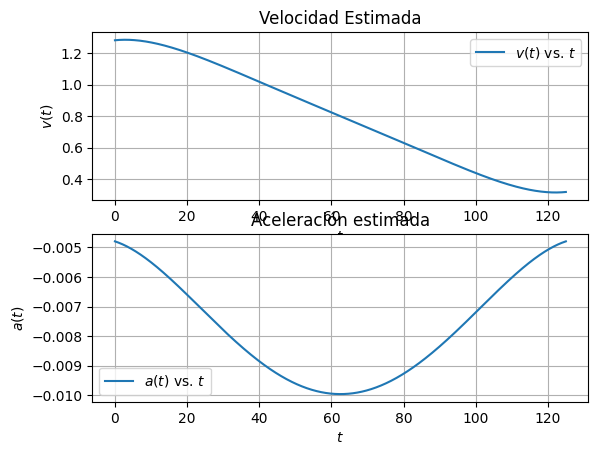

In [7]:
# si queremos tener una estimacion de la trayectoria podemos utilizar un metodo de interpolacion:

v_pol = BarycentricInterpolator(t, v)
a_pol = BarycentricInterpolator(t, a)

t_lin = np.linspace(0, 125, 1000)

fig, ax = plt.subplots(2)

ax[0].plot(t_lin, v_pol(t_lin), label = "$v(t)$ vs. $t$")
ax[0].set_title("Velocidad Estimada")
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v(t)$')
ax[0].grid()
ax[0].legend()


ax[1].plot(t_lin, a_pol(t_lin), label = "$a(t)$ vs. $t$")
ax[1].set_title("Aceleración estimada")
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$a(t)$ ')
ax[1].grid()
ax[1].legend()

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [8]:
# Punto a) por sympy:

z = sp.symbols('z')
kq = sp.symbols('kq_tot')
R = 0.1

V = kq/((z**2 + R**2)**0.5)

V_res = V/kq


E_res = -sp.diff(V_res, z)

# punto b):

v_num = sp.lambdify(z, V_res)
v0 = v_num(0.001)
v1 = v_num(0.1)


E = -np.gradient([v0, v1], [0.001, 0.1])

print(f"con np.gradient el campo en z = 0.1 es {E[0]}")

con np.gradient el campo en z = 0.1 es 29.580123491226278


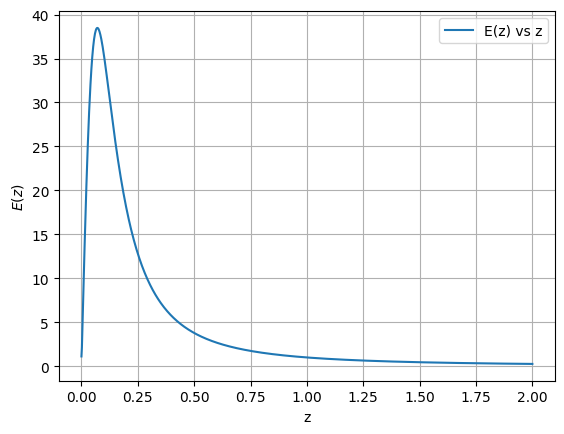

In [9]:
# punto c):

z_lin = np.linspace(0.0001, 2, 1000)
v_lin = v_num(z_lin)

E_lin = -np.gradient(v_lin, z_lin)

plt.plot(z_lin, E_lin, label = 'E(z) vs z')
plt.xlabel('z')
plt.ylabel('$E(z)$')
plt.legend()
plt.grid()
